<a href="https://colab.research.google.com/github/aaKanksha148/CI-Project/blob/main/Data_preprocessing_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


In [13]:
file_path = "synthetic_stroke_data.csv"
df = pd.read_csv("/content/synthetic_stroke_data.csv")

In [15]:
#Dataset info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

Dataset Shape: (50000, 12)

Columns: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [16]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataset Info:")
print(df.info())


Missing Values:
 id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  2500
smoking_status          0
stroke                  0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50000 non-null  int64  
 1   gender             50000 non-null  object 
 2   age                50000 non-null  float64
 3   hypertension       50000 non-null  int64  
 4   heart_disease      50000 non-null  int64  
 5   ever_married       50000 non-null  object 
 6   work_type          50000 non-null  object 
 7   Residence_type     50000 non-null  object 
 8   avg_glucose_level  50000 non-null  float64
 9   

In [17]:
print("\nStatistical Summary:")
print(df.describe(include="all"))


Statistical Summary:
                  id  gender           age  hypertension  heart_disease  \
count   50000.000000   50000  50000.000000  50000.000000   50000.000000   
unique           NaN       2           NaN           NaN            NaN   
top              NaN  Female           NaN           NaN            NaN   
freq             NaN   25040           NaN           NaN            NaN   
mean    25000.500000     NaN     54.021022      0.151220       0.102660   
std     14433.901067     NaN     20.809341      0.358267       0.303517   
min         1.000000     NaN     18.000000      0.000000       0.000000   
25%     12500.750000     NaN     36.100000      0.000000       0.000000   
50%     25000.500000     NaN     54.000000      0.000000       0.000000   
75%     37500.250000     NaN     72.100000      0.000000       0.000000   
max     50000.000000     NaN     90.000000      1.000000       1.000000   

       ever_married      work_type Residence_type  avg_glucose_level  \
count

EDA

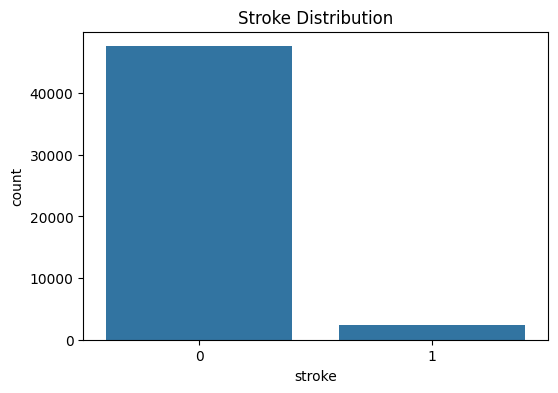

In [18]:
# Stroke class distribution – imbalance check
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='stroke')
plt.title("Stroke Distribution")
plt.show()



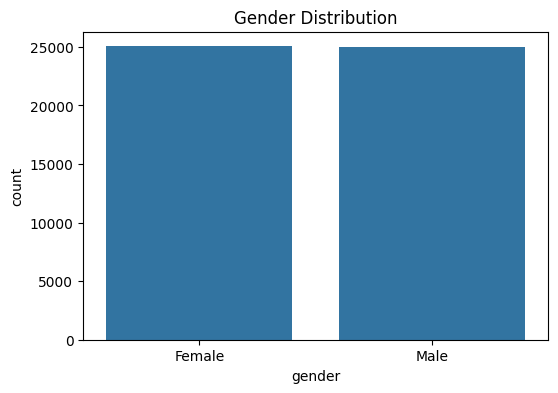

In [19]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.show()

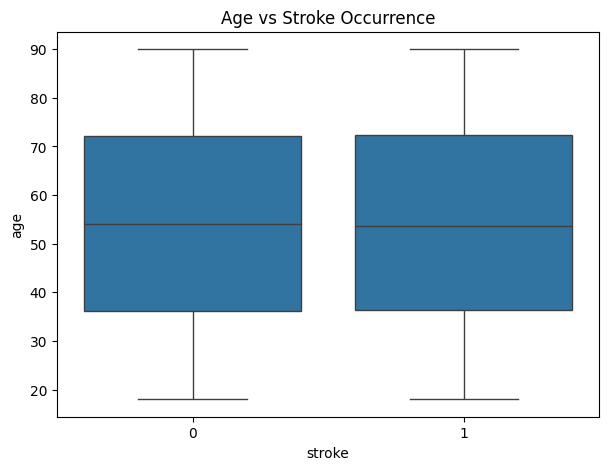

In [20]:
#Age vs Stroke
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="stroke", y="age")
plt.title("Age vs Stroke Occurrence")
plt.show()

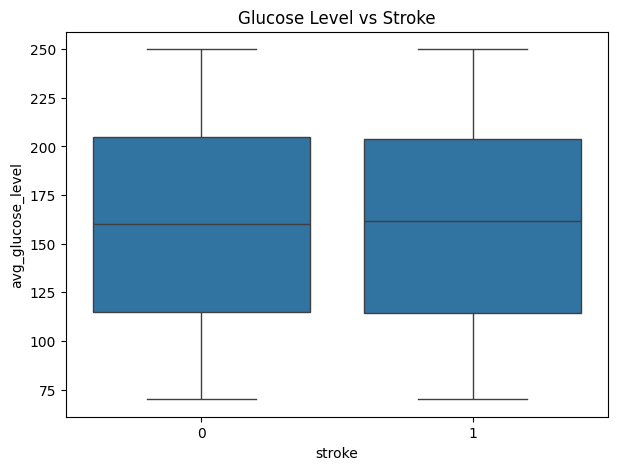

In [21]:
#Glucose level vs Stroke
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="stroke", y="avg_glucose_level")
plt.title("Glucose Level vs Stroke")
plt.show()

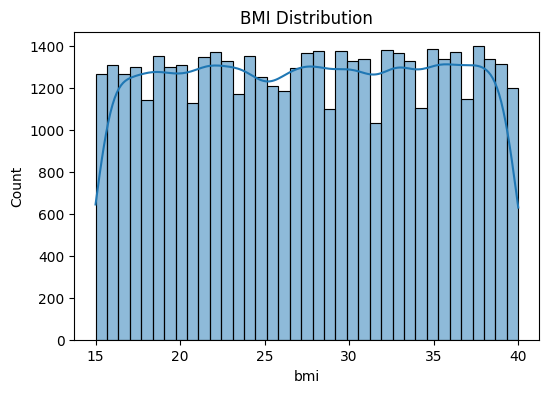

In [22]:
#BMI distribution
plt.figure(figsize=(6,4))
sns.histplot(df['bmi'], kde=True)
plt.title("BMI Distribution")
plt.show()

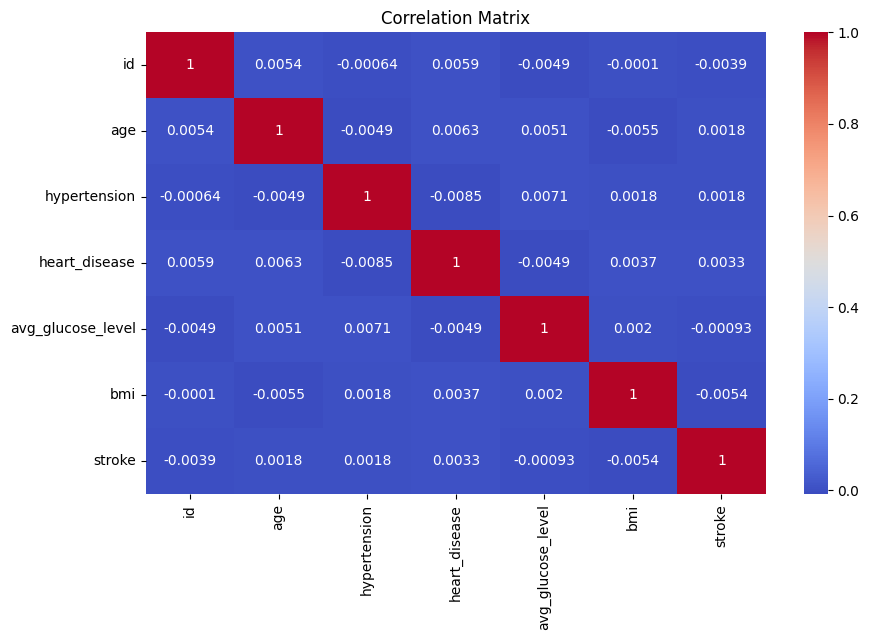

In [23]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['float64','int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Data Preprocessing

In [24]:
#Handling missing values (BMI)
print("\nMissing values before imputation:\n", df.isnull().sum())
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])
print("\nMissing values after imputation:\n", df.isnull().sum())


Missing values before imputation:
 id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  2500
smoking_status          0
stroke                  0
dtype: int64

Missing values after imputation:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [26]:
#Encoding categorical variables using Label Encoding
encoders = {}
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

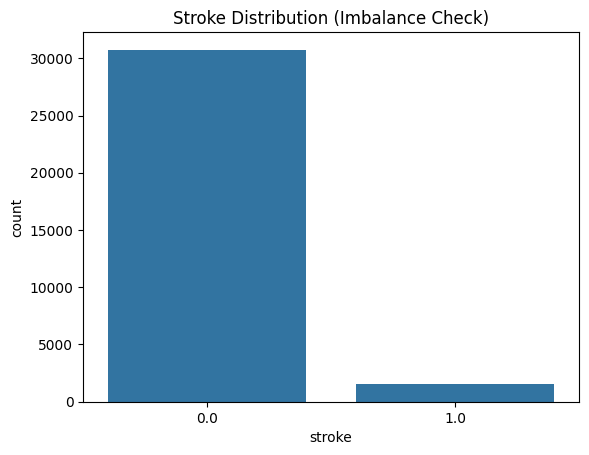

In [11]:
#Confirm preprocessing result
print("\nData after Encoding & Imputation:")
print(df.head())

In [27]:
#Check final dataset info
print("\nPreprocessed Dataset Info:")
print(df.info())


Preprocessed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50000 non-null  int64  
 1   gender             50000 non-null  int64  
 2   age                50000 non-null  float64
 3   hypertension       50000 non-null  int64  
 4   heart_disease      50000 non-null  int64  
 5   ever_married       50000 non-null  int64  
 6   work_type          50000 non-null  int64  
 7   Residence_type     50000 non-null  int64  
 8   avg_glucose_level  50000 non-null  float64
 9   bmi                50000 non-null  float64
 10  smoking_status     50000 non-null  int64  
 11  stroke             50000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 4.6 MB
None
